In [1]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as p

In [2]:
data = pd.read_csv("../data/train.csv", index_col="id", parse_dates=["fecha"]).reset_index()
data["tipodepropiedad"] = data["tipodepropiedad"].map(lambda x: str(x).lower())

In [3]:
precios_dolares = pd.read_csv('../data/precios_en_dolares.csv')

In [4]:
data = data.merge(precios_dolares, how='left')
del precios_dolares

In [5]:
#uso categorías de Lucio
tipo_vivienda = ["apartamento", "casa en condominio", "casa",
                 "villa", "duplex", "departamento compartido", "hospedaje", "quinta vacacional"]
tipo_comercial = ["terreno comercial", "local comercial", "oficina comercial", 
                  "local en centro comercial", "bodega comercial", "inmuebles productivos urbanos"]

tipo_inversion = ["casa uso de suelo", "terreno", "edificio", "huerta", "lote", "garage", "otros", "nave industrial",  "rancho"]
undefined = ["terreno", "edificio", "casa uso de suelo", "otros", "nave industrial", "rancho", "nan", 
             "huerta", "lote", "garage"]  

In [6]:
def get_ancester_category(tipo_de_propiedad):
    if (tipo_de_propiedad in tipo_inversion): return "inversion"

    if (tipo_de_propiedad in tipo_comercial): return "comercial"

    if (tipo_de_propiedad in tipo_vivienda): return "vivienda"

    return "undefined"

In [7]:
data["categoria_padre"] = data["tipodepropiedad"].apply(lambda x: get_ancester_category(x))

# Habitaciones y baños en vivienda

Text(33.0, 0.5, 'Baños')

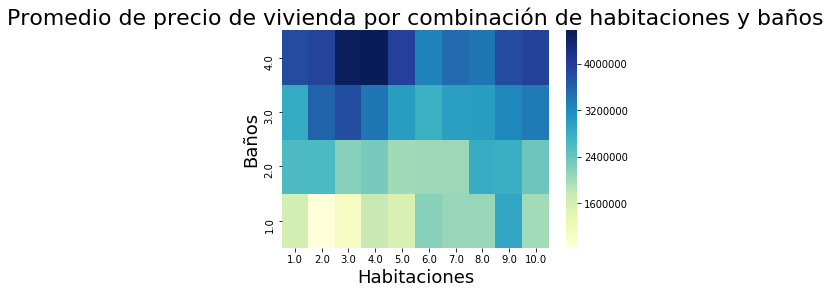

In [8]:
viviendas = data[data['categoria_padre'] == 'vivienda']
#habitacionesbaños_for_heatmap = data[data['categoria_padre'] == 'vivienda'].pivot_table(index='banos', columns='habitaciones', values='precio', aggfunc='mean')
habitacionesbaños_for_heatmap = viviendas.pivot_table(index='banos', columns='habitaciones', values='precio', aggfunc='mean')
g = sb.heatmap(habitacionesbaños_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Promedio de precio de vivienda por combinación de habitaciones y baños", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Baños", fontsize=18)

##Habitcicones y garages en vivienda

Text(33.0, 0.5, 'Garage')

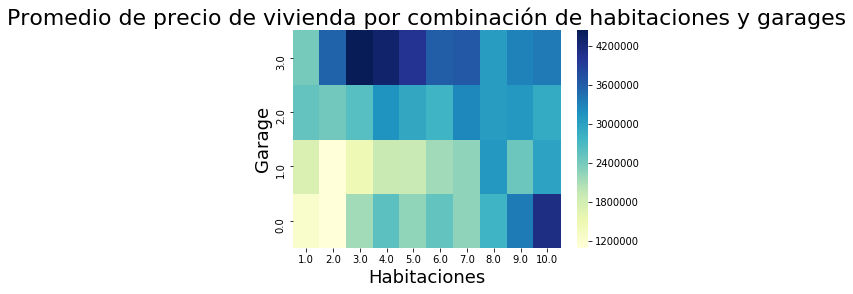

In [9]:
habitaciones_garages_for_heatmap = viviendas.pivot_table(index='garages', columns='habitaciones', values='precio', aggfunc='mean')
g = sb.heatmap(habitaciones_garages_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Promedio de precio de vivienda por combinación de habitaciones y garages", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Garage", fontsize=18)

##Distribución por categoría según precio

In [10]:
#cuantiles = data.quantile([0.2, 0.4, 0.6, 0.8])
cuantiles_precio = data['precio'].quantile([0.25, 0.5, 0.75])
datos = data.loc[data['precio']< cuantiles_precio[0.25]]
datos.shape

(60000, 25)

Text(0, 0.5, 'Frecuencia')

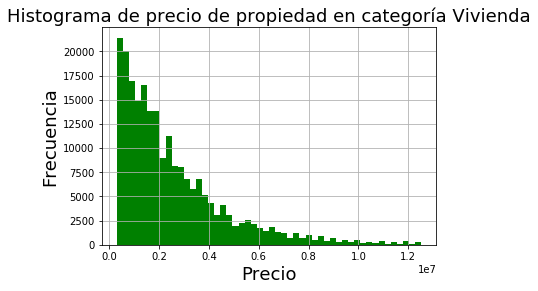

In [11]:
g = viviendas['precio'].plot.hist(bins=50, color='green', grid=True)
g.set_title("Histograma de precio de propiedad en categoría Vivienda", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

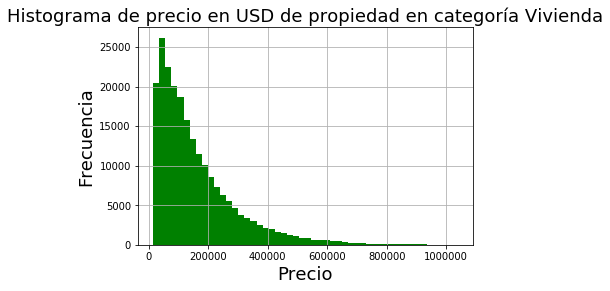

In [12]:
g = viviendas['precio_usd'].plot.hist(bins=50, color='green', grid=True)
g.set_title("Histograma de precio en USD de propiedad en categoría Vivienda", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

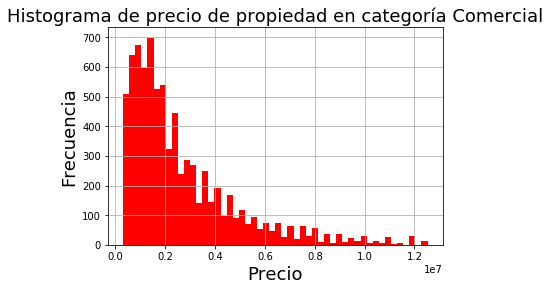

In [13]:
comercios = data[data['categoria_padre'] == 'comercial']
g = comercios['precio'].plot.hist(bins=50, color='red', grid=True)
g.set_title("Histograma de precio de propiedad en categoría Comercial", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

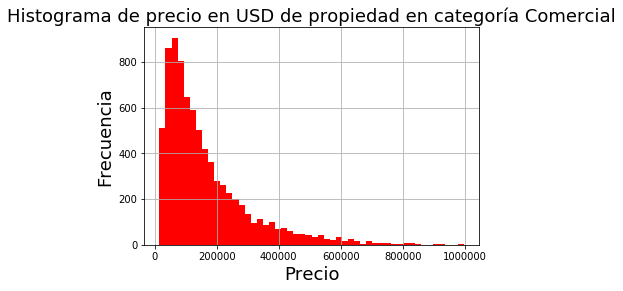

In [14]:
comercios = data[data['categoria_padre'] == 'comercial']
g = comercios['precio_usd'].plot.hist(bins=50, color='red', grid=True)
g.set_title("Histograma de precio en USD de propiedad en categoría Comercial", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

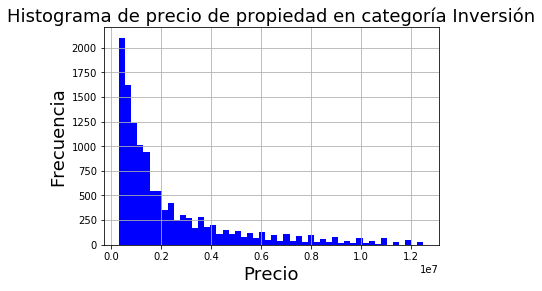

In [15]:
inversion = data[data['categoria_padre'] == 'inversion']
g = inversion['precio'].plot.hist(bins=50, color='blue', grid=True)
g.set_title("Histograma de precio de propiedad en categoría Inversión", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

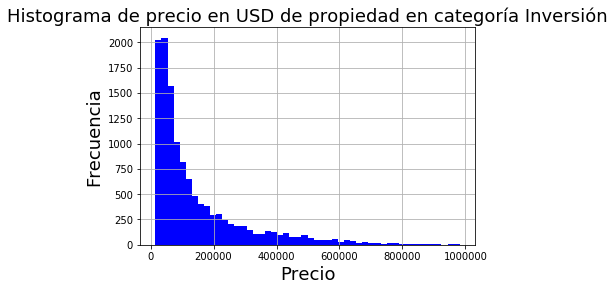

In [16]:
inversion = data[data['categoria_padre'] == 'inversion']
g = inversion['precio_usd'].plot.hist(bins=50, color='blue', grid=True)
g.set_title("Histograma de precio en USD de propiedad en categoría Inversión", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [76]:
undefined = data[data['categoria_padre'] == 'undefined']

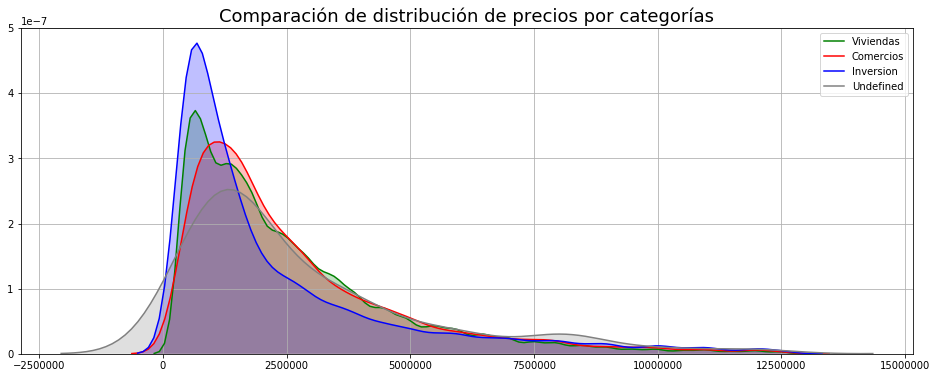

In [77]:
p.figure(figsize=(16, 6))
#g = sb.distplot(viviendas['precio'], color='blue', label='pledged (log)')
#g = sb.distplot(comercios['precio'], color='orange', label='goal (log)')
#g = sb.distplot(inversion['precio'], color='green', label='goal (log)')
g = sb.kdeplot(viviendas['precio'], color="green", shade=True, label='Viviendas')
g = sb.kdeplot(comercios['precio'], color="red", shade=True, label='Comercios')
g = sb.kdeplot(inversion['precio'], color="blue", shade=True, label='Inversion')
g = sb.kdeplot(undefined['precio'], color="grey", shade=True, label='Undefined')
g.set_title("Comparación de distribución de precios por categorías", fontsize=18)
g.set_title("Comparación de distribución de precios por categorías", fontsize=18)
g.grid(True)
p.ticklabel_format(style='plain', axis='x')

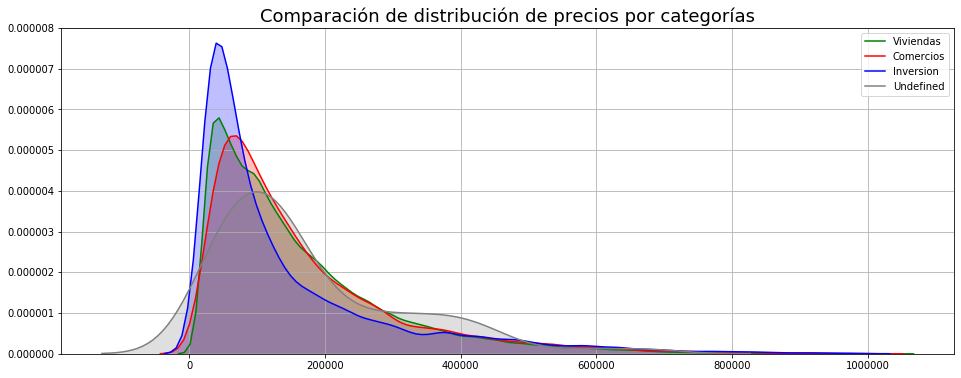

In [80]:
p.figure(figsize=(16, 6))
#g = sb.distplot(viviendas['precio_usd'], color='blue', label='pledged (log)', hist=False)
#g = sb.distplot(comercios['precio_usd'], color='orange', label='goal (log)', hist=False)
#g = sb.distplot(inversion['precio_usd'], color='green', label='goal (log)', hist=False)
g = sb.kdeplot(viviendas['precio_usd'], color="green", shade=True, label='Viviendas')
g = sb.kdeplot(comercios['precio_usd'], color="red", shade=True, label='Comercios')
g = sb.kdeplot(inversion['precio_usd'], color="blue", shade=True, label='Inversion')
g = sb.kdeplot(undefined['precio_usd'], color="grey", shade=True, label='Undefined')
g.set_title("Comparación de distribución de precios por categorías", fontsize=18)
g.grid(True)
p.ticklabel_format(style='plain', axis='x')

Text(0, 0.5, 'Precio')

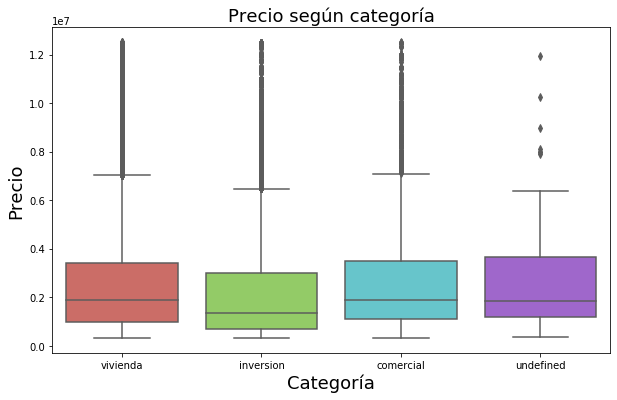

In [19]:
p.figure(figsize=(10, 6))
g = sb.boxplot(x="categoria_padre", y="precio", 
                     data=data, palette="hls")
g.set_title("Precio según categoría", fontsize=18)
g.set_xlabel("Categoría", fontsize=18)
g.set_ylabel("Precio", fontsize=18)

Text(0, 0.5, 'Precio')

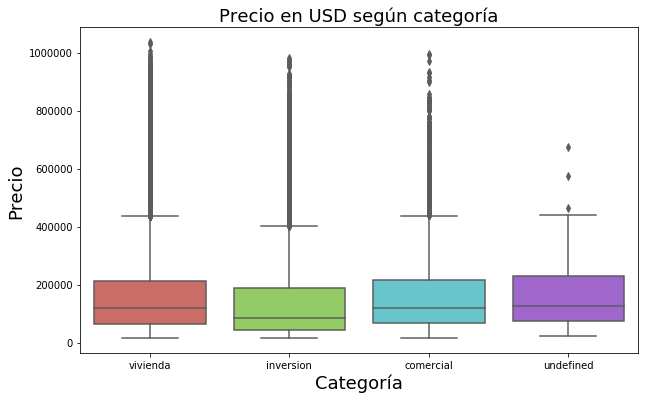

In [20]:
p.figure(figsize=(10, 6))
g = sb.boxplot(x="categoria_padre", y="precio_usd", 
                     data=data, palette="hls")
g.set_title("Precio en USD según categoría", fontsize=18)
g.set_xlabel("Categoría", fontsize=18)
g.set_ylabel("Precio", fontsize=18)

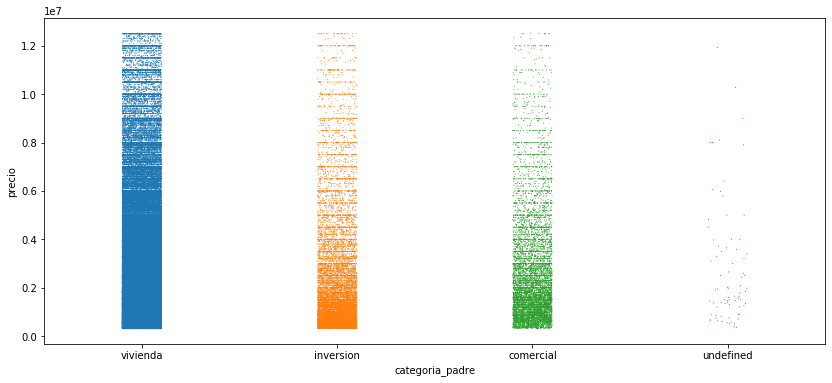

In [21]:
p.figure(figsize=(14, 6))
g = sb.stripplot(x="categoria_padre", y="precio", data=data, jitter=True, size = 1)

In [22]:
cuantiles_precio[0.25]

952772.5

In [23]:
cuantiles_precio[0.5]

1850000.0

In [24]:
cuantiles_precio[0.75]

3390000.0

In [25]:
def get_cuantil(precio, cuantiles):
    if precio < cuantiles[0.25]:
        return "<"+str(cuantiles[0.25])
    if (precio >= cuantiles[0.25]) and (precio < cuantiles[0.5]):
        return "["+str(cuantiles[0.25])+" , "+str(cuantiles[0.5])+")"
    if (precio >= cuantiles[0.5]) and (precio < cuantiles[0.75]):
        return "["+str(cuantiles[0.5])+" , "+str(cuantiles[0.75])+")"
    if (precio >= cuantiles[0.75]):
        return ">"+str(cuantiles[0.75])

In [26]:
data["cuantil"] = data["precio"].apply(lambda x: get_cuantil(x, cuantiles_precio))

Text(0, 0.5, 'Cantidad de propiedades')

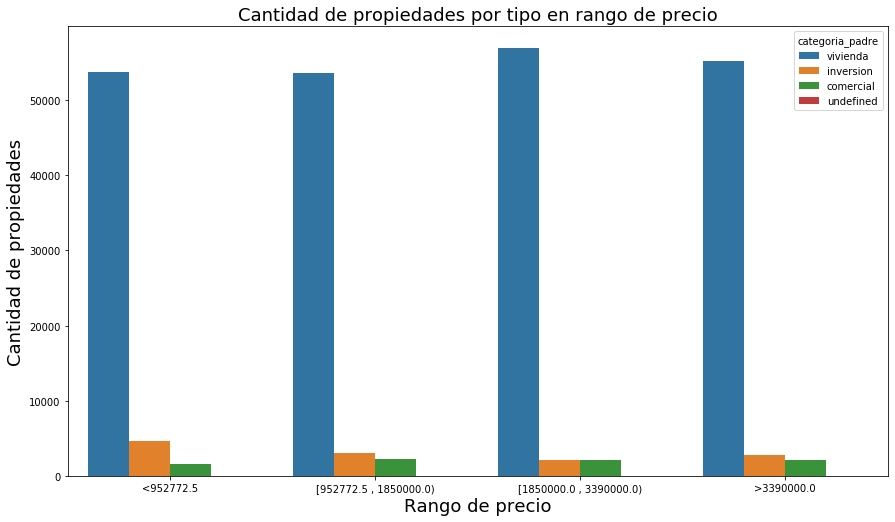

In [27]:
fig,ax = p.subplots()
fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = "cuantil", hue = "categoria_padre", data = data, ax = ax,order=['<952772.5','[952772.5 , 1850000.0)','[1850000.0 , 3390000.0)','>3390000.0'])
g.set_title("Cantidad de propiedades por tipo en rango de precio", fontsize=18)
g.set_xlabel("Rango de precio", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

In [28]:
cantidad_por_categoria = data['categoria_padre'].value_counts()

In [60]:
data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_usd,categoria_padre,cuantil
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0,133740.0,vivienda,"[1850000.0 , 3390000.0)"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0,274625.0,vivienda,>3390000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0,72718.0,vivienda,"[952772.5 , 1850000.0)"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0,49080.0,vivienda,<952772.5
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0,60684.0,vivienda,"[952772.5 , 1850000.0)"


In [66]:
y1 = [data.loc[(data['categoria_padre'] == "vivienda") & (data['cuantil'] == "<952772.5")].shape[0]]
y1.append(data.loc[(data['categoria_padre'] == "vivienda") & (data['cuantil'] == "[952772.5 , 1850000.0)")].shape[0])
y1.append(data.loc[(data['categoria_padre'] == "vivienda") & (data['cuantil'] == "[1850000.0 , 3390000.0)")].shape[0])
y1.append(data.loc[(data['categoria_padre'] == "vivienda") & (data['cuantil'] == ">3390000.0")].shape[0])
y2 = [data.loc[(data['categoria_padre'] == "comercial") & (data['cuantil'] == "<952772.5")].shape[0]]
y2.append(data.loc[(data['categoria_padre'] == "comercial") & (data['cuantil'] == "[952772.5 , 1850000.0)")].shape[0])
y2.append(data.loc[(data['categoria_padre'] == "comercial") & (data['cuantil'] == "[1850000.0 , 3390000.0)")].shape[0])
y2.append(data.loc[(data['categoria_padre'] == "comercial") & (data['cuantil'] == ">3390000.0")].shape[0])
y3 = [data.loc[(data['categoria_padre'] == "inversion") & (data['cuantil'] == "<952772.5")].shape[0]]
y3.append(data.loc[(data['categoria_padre'] == "inversion") & (data['cuantil'] == "[952772.5 , 1850000.0)")].shape[0])
y3.append(data.loc[(data['categoria_padre'] == "inversion") & (data['cuantil'] == "[1850000.0 , 3390000.0)")].shape[0])
y3.append(data.loc[(data['categoria_padre'] == "inversion") & (data['cuantil'] == ">3390000.0")].shape[0])

In [67]:
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)

In [71]:
# memo of sample number
snum = y1+y2+y3

# normalization
y1 = y1/snum*100
y2 = y2/snum*100
y3 = y3/snum*100

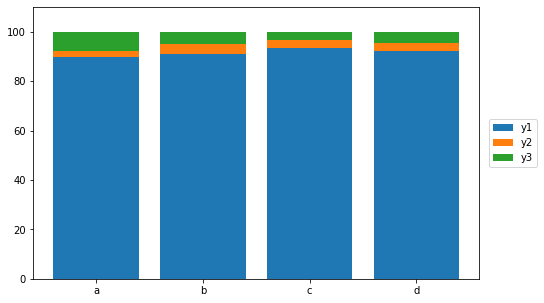

In [74]:
p.figure(figsize=(8,5))

# stack bars
p.bar(x, y1, label='Viviendas')
p.bar(x, y2 ,bottom=y1,label='Comercios')
p.bar(x, y3 ,bottom=y1+y2,label='Inversión')


p.ylim(0,110)

p.legend(bbox_to_anchor=(1.01,0.5), loc='center left')

In [75]:
data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_usd,categoria_padre,cuantil
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0,133740.0,vivienda,"[1850000.0 , 3390000.0)"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0,274625.0,vivienda,>3390000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0,72718.0,vivienda,"[952772.5 , 1850000.0)"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0,49080.0,vivienda,<952772.5
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0,60684.0,vivienda,"[952772.5 , 1850000.0)"
